In [177]:
import random
import statistics
import numpy as np
from scipy.signal import butter, filtfilt,sosfilt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pywt
import math

In [178]:
normal_train_path="Normal&LBBB/Normal_Train.txt"
normal_test_path = "Normal&LBBB/Normal_Test.txt"
lbbb_train_path = "Normal&LBBB/LBBB_Train.txt"
lbbb_test_path = "Normal&LBBB/LBBB_Test.txt"

In [179]:
FS=360
LOW_CUT=0.5
HIGH_CUT=40

In [180]:
def plot(numbers:list,title):
    # Generate x-coordinates (index of each number)
    x = list(range(len(numbers)))

    # Draw a line through the points
    plt.plot(x, numbers, color='blue', linestyle='-', linewidth=2)

    # Add labels and a legend
    plt.xlabel('Index')
    plt.ylabel('ECG')
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

In [181]:
def getDataEntries(filename):
    data = []
    with open(filename, "r") as file:
        for line in file:
            parts = line.strip().split('|')
            data.append(parts)
    data = [i[:len(i)-1] for i in data]
    new_data = []
    for inner_list in data:
        new_inner_list = [float(element) for element in inner_list]
        new_data.append(new_inner_list)
    return new_data

In [182]:
normal_train=getDataEntries(normal_train_path)
normal_test = getDataEntries(normal_test_path)
lbbb_train=getDataEntries(lbbb_train_path)
lbbb_test=getDataEntries(lbbb_test_path)


In [183]:
print(len(normal_train),len(normal_test),len(lbbb_train),len(lbbb_test))

200 200 399 394


C:\Users\mazen\AppData\Local\Temp\ipykernel_9228\522643902.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


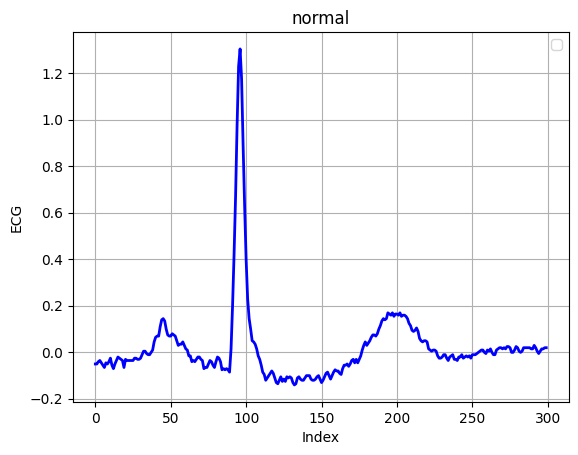

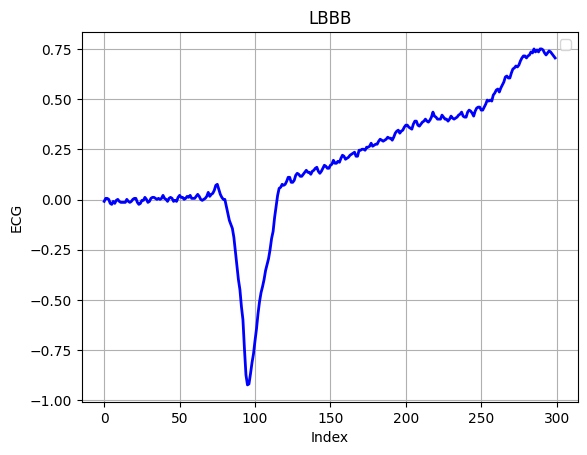

In [184]:
plot(normal_train[0],"normal")
plot(lbbb_train[0],"LBBB")

In [185]:
def remove_mean(signal:list):
    mean= statistics.mean(signal)
    new_signal=[i-mean for i in signal]
    return new_signal

def remove_mean_for_all(signals:list):
    new_signals=[]
    for i in range(len(signals)):
        new_signals.append(remove_mean(signals[i]))
    return new_signals

In [186]:
normal_train=remove_mean_for_all(normal_train)
normal_test=remove_mean_for_all(normal_test)
lbbb_test=remove_mean_for_all(lbbb_test)
lbbb_train=remove_mean_for_all(lbbb_train)

C:\Users\mazen\AppData\Local\Temp\ipykernel_9228\522643902.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


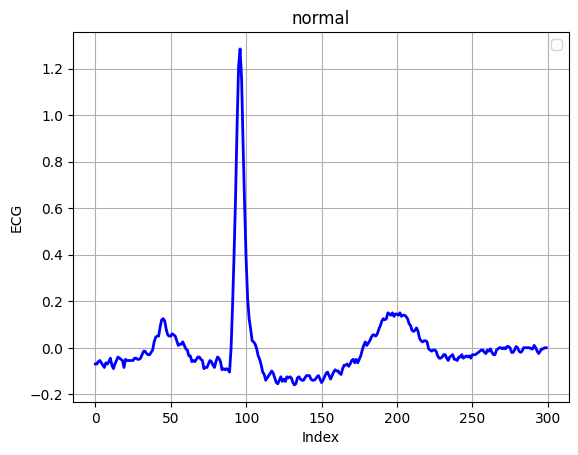

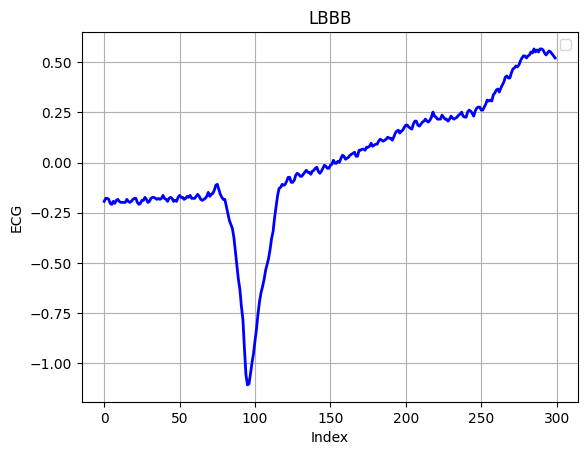

In [187]:
plot(normal_train[0],"normal")
plot(lbbb_train[0],"LBBB")

In [188]:
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    """
    Apply a bandpass filter to a signal.

    Parameters:
        signal (array): Input signal.
        fs (float): Sampling frequency of the signal.
        lowcut (float): Low cutoff frequency of the bandpass filter.
        highcut (float): High cutoff frequency of the bandpass filter.
        order (int): Order of the filter. Default is 4.

    Returns:
        filtered_signal (array): Filtered signal.
    """
    # Design a bandpass filter using the Butterworth design
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    sos = butter(order, [low, high], btype='band', output='sos')

    # Apply the filter to the signal
    filtered_signal = sosfilt(sos, signal)

    return filtered_signal
def bandpass_filter_for_all(signals:list):
    new_signals=[]
    for i in range(len(signals)):
        new_signals.append(bandpass_filter(signals[i],FS,LOW_CUT,HIGH_CUT))
    return new_signals    

In [189]:
normal_train=bandpass_filter_for_all(normal_train)
normal_test=bandpass_filter_for_all(normal_test)
lbbb_test=bandpass_filter_for_all(lbbb_test)
lbbb_train=bandpass_filter_for_all(lbbb_train)

C:\Users\mazen\AppData\Local\Temp\ipykernel_9228\522643902.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


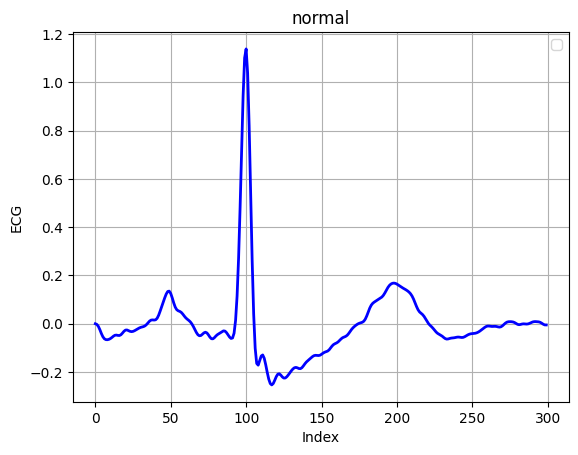

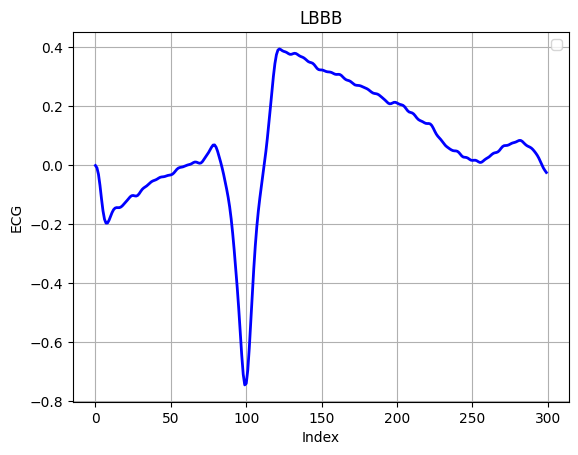

In [190]:
plot(normal_train[0],"normal")
plot(lbbb_train[0],"LBBB")

In [191]:
def normalize_signal(signal, new_min=0, new_max=1):
    """
    Normalize a signal to a specified range [new_min, new_max].

    Parameters:
        signal (array-like): Input signal to be normalized.
        new_min (float): Minimum value of the normalized signal.
        new_max (float): Maximum value of the normalized signal.

    Returns:
        numpy.ndarray: Normalized signal.
    """
    signal = np.array(signal)
    old_min = np.min(signal)
    old_max = np.max(signal)
    
    if old_min == old_max:
        raise ValueError("Signal has no variation (all values are the same).")
    
    normalized_signal = (signal - old_min) / (old_max - old_min)  # Scale to [0, 1]
    normalized_signal = normalized_signal * (new_max - new_min) + new_min  # Scale to [new_min, new_max]
    
    return normalized_signal
def normalize_for_all(signals:list):
    new_signals=[]
    for i in range(len(signals)):
        new_signals.append(normalize_signal(signals[i],-1,1))
    return new_signals    

In [192]:
normal_train=normalize_for_all(normal_train)
normal_test=normalize_for_all(normal_test)
lbbb_test=normalize_for_all(lbbb_test)
lbbb_train=normalize_for_all(lbbb_train)

C:\Users\mazen\AppData\Local\Temp\ipykernel_9228\522643902.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


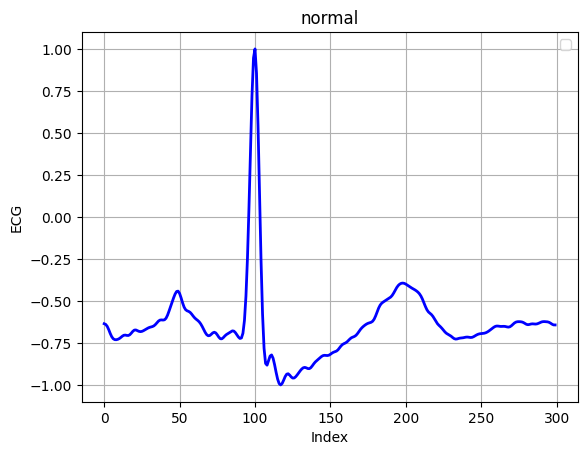

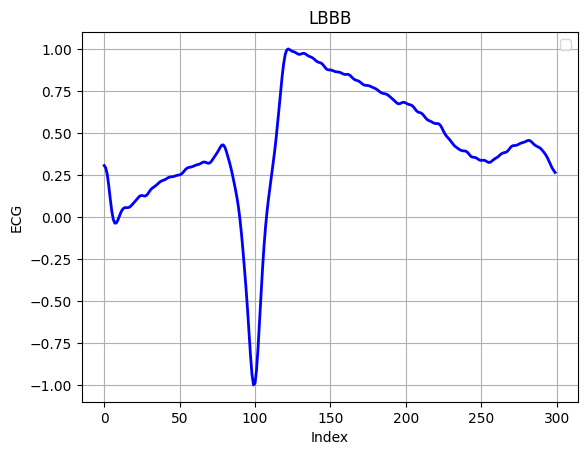

In [193]:
plot(normal_train[0],"normal")
plot(lbbb_train[0],"LBBB")